In [33]:
# Первый шаг: Импортируем необходимые библиотеки
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Второй шаг: Загрузка и первичный анализ данных
# Загрузка данных о недвижимости
df = pd.read_csv('Real-estate.csv')
print("Анализ Real-estate.csv:")
print(df.describe())
print(df.head())

# Загрузка данных о зарплатах
salary_data = pd.read_csv('Salary_dataset.csv')
print("\nАнализ Salary_dataset.csv:")
print(salary_data.describe())
print(salary_data.head())


# Загрузка данных о мед.страховании
insurance_data = pd.read_csv('insurance.csv')
print("Анализ insurance.csv:")
print(insurance_data.describe())
print(insurance_data.head())

# Загрузка данных о Выбросах CO2 от автомобиля
emissions_data = pd.read_csv('CO2_Emissions_Canada.csv')
print("\nCO2_Emissions_Canada.csv:")
print(emissions_data.describe())
print(salary_data.head())

Анализ Real-estate.csv:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenien

In [35]:
X_real_estate = df[['X2 house age']]
y_real_estate = df['Y house price of unit area']

# Обучение модели для недвижимости
model_real_estate = LinearRegression()
model_real_estate.fit(X_real_estate, y_real_estate)

# Предсказания для недвижимости
predictions_real_estate = model_real_estate.predict(X_real_estate)

# Для зарплат
X_salary = salary_data[['YearsExperience']]
y_salary = salary_data['Salary']

# Обучение модели для зарплат
model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

# Предсказания для зарплат
predictions_salary = model_salary.predict(X_salary)

# Четвертый шаг: Визуализация данных с помощью Plotly
# Создаем график с двумя подграфиками
fig = make_subplots(rows=1, cols=2, subplot_titles=("House Price vs. House Age (Real-estate)", "Salary vs. Years of Experience"))

# График для "Real-estate"
fig.add_trace(go.Scatter(x=df['X2 house age'], y=predictions_real_estate, mode='lines', name='Linear Regression (Real-estate)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['X2 house age'], y=df['Y house price of unit area'], mode='markers', name='Data (Real-estate)'), row=1, col=1)

# График для "Salary"
fig.add_trace(go.Scatter(x=salary_data['YearsExperience'], y=predictions_salary, mode='lines', name='Linear Regression (Salary)'), row=1, col=2)
fig.add_trace(go.Scatter(x=salary_data['YearsExperience'], y=salary_data['Salary'], mode='markers', name='Data (Salary)'), row=1, col=2)

# Настраиваем внешний вид графиков
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=2)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=2)

# Добавляем кнопку переключения между графиками
updatemenu = [{
    'type': 'buttons',
    'showactive': False,
    'buttons': [
        {
            'label': 'House Price vs. House Age (Real-estate)',
            'method': 'update',
            'args': [{'visible': [True, True, False, False]}, 
                     {'title': 'House Price vs. House Age (Real-estate)'}]
        },
        {
            'label': 'Salary vs. Years of Experience',
            'method': 'update',
            'args': [{'visible': [False, False, True, True]}, 
                     {'title': 'Salary vs. Years of Experience'}]
        }
    ]
}]

fig.update_layout(showlegend=True, legend=dict(x=0.7, y=0.95), updatemenus=updatemenu)
fig.update_layout(title_text="Comparison of Two Datasets", title_x=0.5)

# Отображаем график
fig.show()



In [25]:
import numpy as np

# Для данных о недвижимости
x_real_estate = df['X2 house age']
y_real_estate = df['Y house price of unit area']

a_real_estate = np.sum((x_real_estate - x_real_estate.mean()) * (y_real_estate - y_real_estate.mean())) / np.sum((x_real_estate - x_real_estate.mean())**2)
b_real_estate = y_real_estate.mean() - a_real_estate * x_real_estate.mean()

# Для данных о зарплатах
x_salary = salary_data['YearsExperience']
y_salary = salary_data['Salary']

a_salary = np.sum((x_salary - x_salary.mean()) * (y_salary - y_salary.mean())) / np.sum((x_salary - x_salary.mean())**2)
b_salary = y_salary.mean() - a_salary * x_salary.mean()

# Расчет MSE
mse_real_estate = np.mean((y_real_estate - (a_real_estate * x_real_estate + b_real_estate))**2)
mse_salary = np.mean((y_salary - (a_salary * x_salary + b_salary))**2)

# Вывод результатов
print("Real Estate Linear Regression MSE:", mse_real_estate)
print("Salary Linear Regression MSE:", mse_salary)


Real Estate Linear Regression MSE: 176.50047403131393
Salary Linear Regression MSE: 31270951.72228096


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Вычисляем средние значения для dummy models
mean_y_real_estate = y_real_estate.mean()
mean_y_salary = y_salary.mean()

# Создаем многопанельный график
fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Estate", "Salary"))

# Добавляем данные, линейную регрессию и dummy model для недвижимости
fig.add_trace(go.Scatter(x=x_real_estate, y=y_real_estate, mode='markers', name='Real Data (Real Estate)', marker=dict(color='blue'), hoverinfo='text', text=x_real_estate), row=1, col=1)
fig.add_trace(go.Scatter(x=x_real_estate, y=predictions_real_estate, mode='lines', name='Linear Regression (Real Estate)', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=[x_real_estate.min(), x_real_estate.max()], y=[mean_y_real_estate, mean_y_real_estate], mode='lines', name='Dummy Model (Real Estate)', line=dict(color='green', dash='dash')), row=1, col=1)

# Добавляем данные, линейную регрессию и dummy model для зарплат
fig.add_trace(go.Scatter(x=x_salary, y=y_salary, mode='markers', name='Real Data (Salary)', marker=dict(color='blue'), hoverinfo='text', text=x_salary), row=1, col=2)
fig.add_trace(go.Scatter(x=x_salary, y=predictions_salary, mode='lines', name='Linear Regression (Salary)', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=[x_salary.min(), x_salary.max()], y=[mean_y_salary, mean_y_salary], mode='lines', name='Dummy Model (Salary)', line=dict(color='green', dash='dash')), row=1, col=2)

# Добавляем интерактивные элементы управления для выбора отображаемых данных
buttons = [
    dict(label='All',
         method='update',
         args=[{'visible': [True, True, True, True, True, True]},
               {'title': 'All Data'}]),
    dict(label='Real Estate',
         method='update',
         args=[{'visible': [True, True, True, False, False, False]},
               {'title': 'Real Estate Data'}]),
    dict(label='Salary',
         method='update',
         args=[{'visible': [False, False, False, True, True, True]},
               {'title': 'Salary Data'}]),
]

# Добавляем кнопки в макет
fig.update_layout(updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}])

# Обновляем макет
fig.update_layout(title_text="Comparison of Two Datasets with Linear Regression and Dummy Model")

# Отображаем график
fig.show()

# Вычисляем MSE для dummy models
mse_dummy_real_estate = np.mean((y_real_estate - mean_y_real_estate)**2)
mse_dummy_salary = np.mean((y_salary - mean_y_salary)**2)

print("Dummy Model MSE (Real Estate):", mse_dummy_real_estate)
print("Dummy Model MSE (Salary):", mse_dummy_salary)


Dummy Model MSE (Real Estate): 184.68931783705574
Dummy Model MSE (Salary): 726499261.7333333


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Для модели недвижимости
rss_real_estate = np.sum((y_real_estate - predictions_real_estate) ** 2)
r2_real_estate = r2_score(y_real_estate, predictions_real_estate)

# Для модели зарплат
rss_salary = np.sum((y_salary - predictions_salary) ** 2)
r2_salary = r2_score(y_salary, predictions_salary)

print("Real Estate Model: RSS =", rss_real_estate, "R2-Score =", r2_real_estate)
print("Salary Model: RSS =", rss_salary, "R2-Score =", r2_salary)


Real Estate Model: RSS = 73071.19624896397 R2-Score = 0.04433848097791171
Salary Model: RSS = 938128551.6684293 R2-Score = 0.9569566641435086


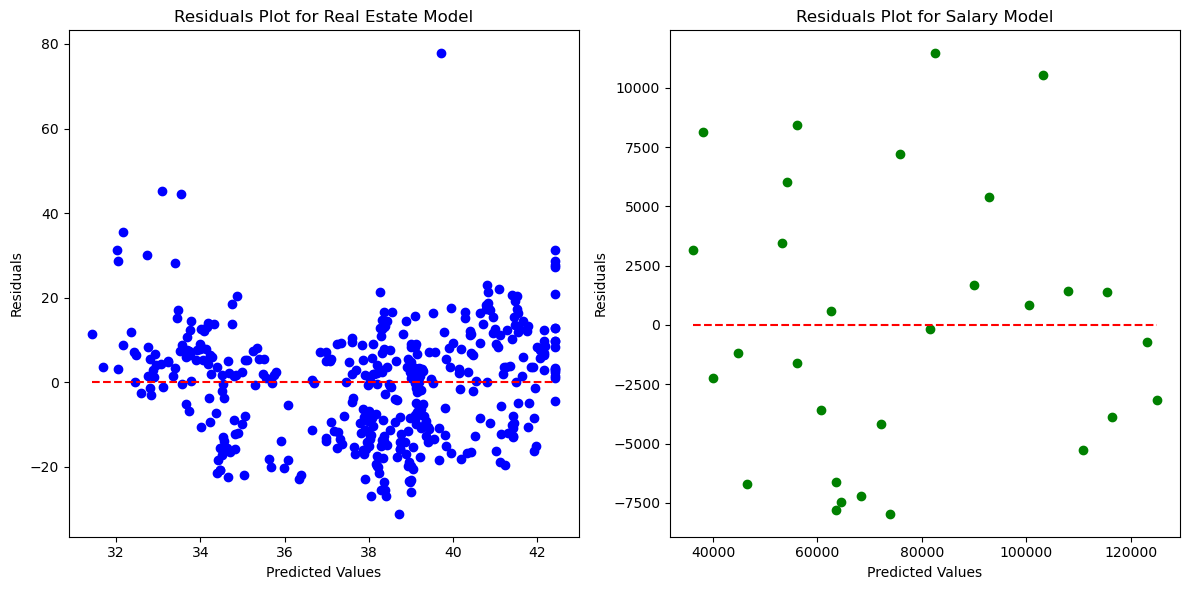

In [28]:
import matplotlib.pyplot as plt

# Расчет остатков для модели недвижимости
residuals_real_estate = y_real_estate - predictions_real_estate

# Расчет остатков для модели зарплат
residuals_salary = y_salary - predictions_salary

# Создание графиков остатков
plt.figure(figsize=(12, 6))

# График остатков для модели недвижимости
plt.subplot(1, 2, 1)
plt.scatter(predictions_real_estate, residuals_real_estate, color='blue')
plt.hlines(y=0, xmin=predictions_real_estate.min(), xmax=predictions_real_estate.max(), colors='red', linestyles='--')
plt.title('Residuals Plot for Real Estate Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# График остатков для модели зарплат
plt.subplot(1, 2, 2)
plt.scatter(predictions_salary, residuals_salary, color='green')
plt.hlines(y=0, xmin=predictions_salary.min(), xmax=predictions_salary.max(), colors='red', linestyles='--')
plt.title('Residuals Plot for Salary Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


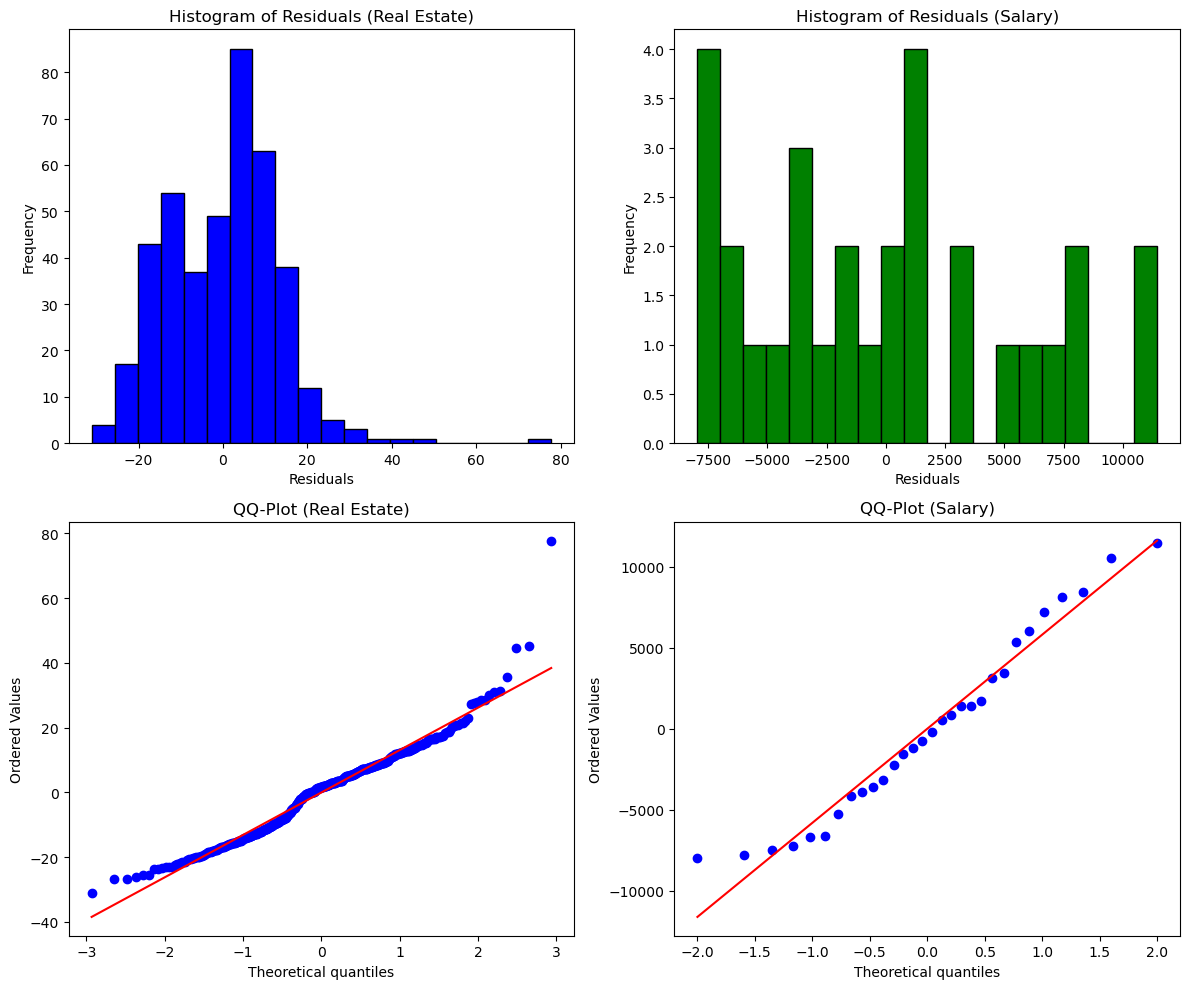

In [29]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Предполагается, что переменные 'y_real_estate', 'predictions_real_estate', 'y_salary', 'predictions_salary' уже определены

# Расчет остатков для модели недвижимости
residuals_real_estate = y_real_estate - predictions_real_estate

# Расчет остатков для модели зарплат
residuals_salary = y_salary - predictions_salary

# Создание графиков остатков
plt.figure(figsize=(12, 10))

# Гистограмма остатков для модели недвижимости
plt.subplot(2, 2, 1)
plt.hist(residuals_real_estate, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals (Real Estate)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Гистограмма остатков для модели зарплат
plt.subplot(2, 2, 2)
plt.hist(residuals_salary, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Residuals (Salary)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# QQ-Plot для модели недвижимости
plt.subplot(2, 2, 3)
stats.probplot(residuals_real_estate, dist="norm", plot=plt)
plt.title('QQ-Plot (Real Estate)')

# QQ-Plot для модели зарплат
plt.subplot(2, 2, 4)
stats.probplot(residuals_salary, dist="norm", plot=plt)
plt.title('QQ-Plot (Salary)')

plt.tight_layout()
plt.show()


In [64]:
# Creating a subplot with four plots
fig = make_subplots(rows=1, cols=4, subplot_titles=("House Price vs.<br>House Age", 
    "Salary vs.<br>Experience",
    "Insurance Charges<br>vs. BMI",
    "CO2 Emissions<br>vs. Engine Size"))



# For Real Estate dataset
X_real_estate = df[['X2 house age']]
y_real_estate = df['Y house price of unit area']

# Model for Real Estate
model_real_estate = LinearRegression()
model_real_estate.fit(X_real_estate, y_real_estate)
predictions_real_estate = model_real_estate.predict(X_real_estate)

# For Salary dataset
X_salary = salary_data[['YearsExperience']]
y_salary = salary_data['Salary']

# Model for Salary
model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)
predictions_salary = model_salary.predict(X_salary)

# Adding traces for Real Estate and Salary datasets
fig.add_trace(go.Scatter(x=df['X2 house age'], y=predictions_real_estate, mode='lines', name='Linear Regression (Real-estate)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['X2 house age'], y=df['Y house price of unit area'], mode='markers', name='Data (Real-estate)'), row=1, col=1)

fig.add_trace(go.Scatter(x=salary_data['YearsExperience'], y=predictions_salary, mode='lines', name='Linear Regression (Salary)'), row=1, col=2)
fig.add_trace(go.Scatter(x=salary_data['YearsExperience'], y=salary_data['Salary'], mode='markers', name='Data (Salary)'), row=1, col=2)

# For insurance dataset
X_insurance_bmi = insurance_data[['bmi']]
y_insurance_charges = insurance_data['charges']
# Model for insurance
model_insurance_bmi = LinearRegression()
model_insurance_bmi.fit(X_insurance_bmi, y_insurance_charges)
predictions_insurance_bmi = model_insurance_bmi.predict(X_insurance_bmi)

fig.add_trace(go.Scatter(x=insurance_data['bmi'], y=predictions_insurance_bmi, mode='lines', name='Linear Regression (Insurance)'), row=1, col=3)
fig.add_trace(go.Scatter(x=insurance_data['bmi'], y=insurance_data['charges'], mode='markers', name='Data (Insurance)'), row=1, col=3)

# For CO
# For CO2 emissions dataset
X_emissions = emissions_data[['Engine Size(L)']]
y_emissions = emissions_data['CO2 Emissions(g/km)']

# Model for CO2 emissions
model_emissions = LinearRegression()
model_emissions.fit(X_emissions, y_emissions)
predictions_emissions = model_emissions.predict(X_emissions)

# Adding traces for CO2 Emissions dataset
fig.add_trace(go.Scatter(x=emissions_data['Engine Size(L)'], y=predictions_emissions, mode='lines', name='Linear Regression (CO2 Emissions)'), row=1, col=4)
fig.add_trace(go.Scatter(x=emissions_data['Engine Size(L)'], y=emissions_data['CO2 Emissions(g/km)'], mode='markers', name='Data (CO2 Emissions)'), row=1, col=4)


new_updatemenu = [
    {'args': [{'visible': [True, True, False, False, False, False, False, False]}, 
              {'title': 'House Price vs. House Age (Real-estate)'}],
     'label': 'Real-estate Full',
     'method': 'update'},
    {'args': [{'visible': [False, False, True, True, False, False, False, False]}, 
              {'title': 'Salary vs. Years of Experience'}],
     'label': 'Salary Full',
     'method': 'update'},
    {'args': [{'visible': [False, False, False, False, True, True, False, False]}, 
              {'title': 'Insurance Charges vs. BMI'}],
     'label': 'Insurance Full',
     'method': 'update'},
    {'args': [{'visible': [False, False, False, False, False, False, True, True]}, 
              {'title': 'CO2 Emissions vs. Engine Size'}],
     'label': 'CO2 Full',
     'method': 'update'},
    {'args': [{'visible': [True, True, True, True, True, True, True, True]}, 
              {'title': 'All Charts'}],
     'label': 'All',
     'method': 'update'}
]
# Обновление макета с новым меню обновлений
fig.update_layout(
    title_font_size=10,
    width=1200,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
    margin=dict(l=20, r=20, t=20, b=20),
    updatemenus=[{
        'buttons': new_updatemenu,
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.25,  # Adjust this value as needed
        'yanchor': 'top'
    }]
)
# Отображение обновленной фигуры
fig.show()



In [58]:
!pip install --upgrade plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 4.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.17.0
    Uninstalling plotly-5.17.0:
      Successfully uninstalled plotly-5.17.0
